**Step-1:** **DATA LOADING**

In [ ]:
# Importing data from google drive:
from google.colab import drive
drive.mount('/content/drive')

# Importing imp. python libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading CSV file of dataset:
data = pd.read_csv("/content/drive/MyDrive/shopdata.csv", encoding="ISO-8859-1", dtype={'CustomerID': str})

# View size of Dataset:
print(f'Size of the dataset: {data.shape}')
print(f'Number of rows in the dataset: {data.shape[0]}')
print(f'Number of columns in the dataset: {data.shape[1]}')

Size of the dataset: (541909, 8)
Number of rows in the dataset: 541909
Number of columns in the dataset: 8


In [ ]:
# View dataset:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


**Step-2: DATA CLEANING**

In [ ]:
# Checking for the total number of null values in the dataset:
missing_count = data.isnull().sum()
missing_count

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
missing_values = data[data.isna().any(axis=1)]
missing_values.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
# Dropping data with null values:
data = data.dropna()

# View size of the data:
print(f'size of dataset after removing null values: {data.shape}')
print(f'Number of rows in the dataset after removing null value: {data.shape[0]}')
print(f'Number of columns in the dataset after removing null value: {data.shape[1]}')

size of dataset after removing null values: (406829, 8)
Number of rows in the dataset after removing null value: 406829
Number of columns in the dataset after removing null value: 8


In [ ]:
# Removed all null values from the dataset:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Set Invoice date column as index (which allows easy access and manipulation of data based on dates):
data.set_index('InvoiceDate', inplace=True)

# Checking transformed dataset:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
12/1/2010 8:26,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
12/1/2010 8:26,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
12/1/2010 8:26,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
12/1/2010 8:26,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
12/1/2010 8:26,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


In [ ]:
# Transforming Invoice date column to datetime datatype:
print(type(data.index))
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

<class 'pandas.core.indexes.base.Index'>


In [ ]:
# Construct three new columns of day, week and day_of_week in data by using Invoice date column:
data['Day'] = data.index.day
data['Month'] = data.index.month
data['Day_of_week'] = data.index.day_name()

# View transformed dataset:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Day_of_week
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,1,12,Wednesday
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,1,12,Wednesday


In [ ]:
# make new column of month name by using index column:
import calendar
data['Month_name'] = data.index.month_name()

# View transformed data:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Day_of_week,Month_name
InvoiceDate,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,1,12,Wednesday,December
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,1,12,Wednesday,December
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,1,12,Wednesday,December
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,1,12,Wednesday,December
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,1,12,Wednesday,December


**Step-3: EDA (DATA VISUALIZATION)**

In [ ]:
# Counting values for all months:
Month_c = data['Month'].value_counts()
Month_c

Month
11    65598
10    50695
12    44511
9     40822
5     28908
6     27836
3     27822
8     27662
7     27502
4     23198
1     21912
2     20363
Name: count, dtype: int64

In [ ]:
# Counting total values of all the months:
Month_count = data['Month_name'].value_counts()
Month_count.sort_values()

Month_name
February     20363
January      21912
April        23198
July         27502
August       27662
March        27822
June         27836
May          28908
September    40822
December     44511
October      50695
November     65598
Name: count, dtype: int64

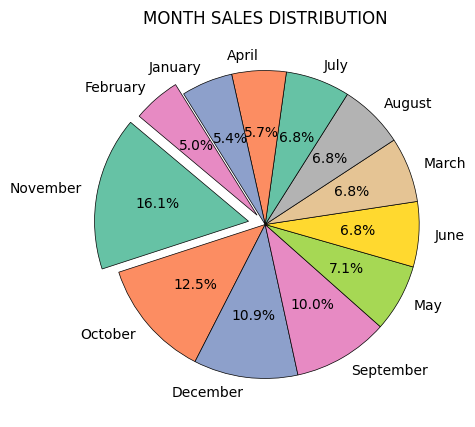

In [ ]:
# Constructing Pie-chart of month wise sales distribution:

# Set size of the figure:
plt.figure(figsize=(8, 5))

# make pie-chart:
plt.pie(Month_count, labels=Month_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'),explode=[0.11,0,0,0,0,0,0,0,0,0,0,0.08],wedgeprops=dict(edgecolor='black', linewidth=0.5))

# Give tittle to the chart:
plt.title('Month Sales Distribution'.upper())

#Displaying the Plot:
plt.show()

In [ ]:
# Add new column named "sales" to the data (obtained by multiplying quantity with unit price):
data['Sales'] = data['Quantity']*data['UnitPrice']

# Show transformed data:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Day_of_week,Month_name,Sales
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,1,12,Wednesday,December,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,1,12,Wednesday,December,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34


In [ ]:
# Counting values of day_of_weeks column:
Day_of_week_counts = data['Day_of_week'].value_counts()
Day_of_week_counts

Day_of_week
Thursday     82374
Wednesday    70599
Tuesday      68110
Monday       66382
Sunday       63237
Friday       56127
Name: count, dtype: int64

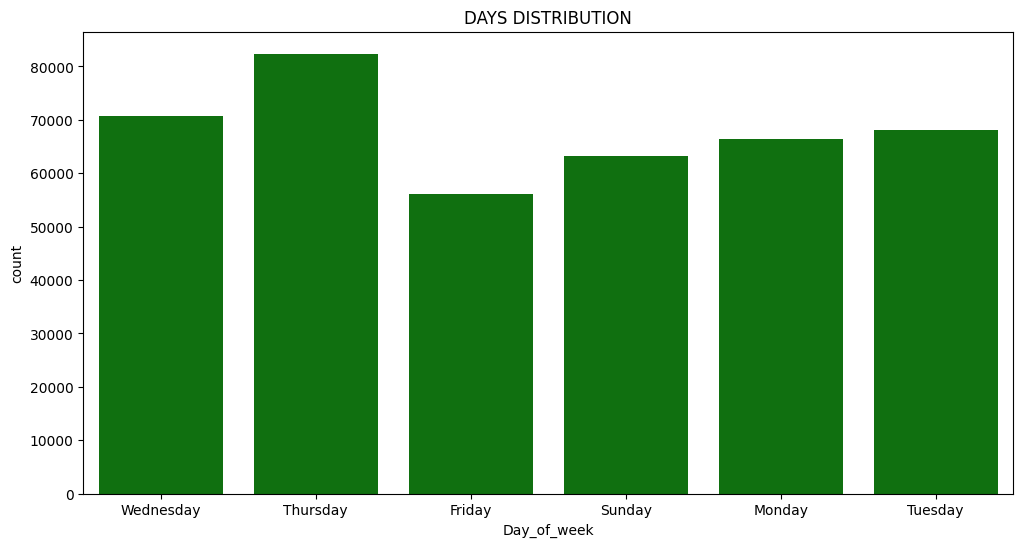

In [ ]:
# construct count plot of day wise sales distribution:

# Set size of the figure:
plt.figure(figsize=(12, 6))
b = sns.countplot(x='Day_of_week', data=data, color='green')

# Give tittle to the chart:
plt.title('Days Distribution'.upper())

#Displaying the Plot:,
plt.show()

In [ ]:
# Counting values of different countries:
country_count = data['Country'].value_counts()
country_count

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


<Axes: xlabel='Country'>

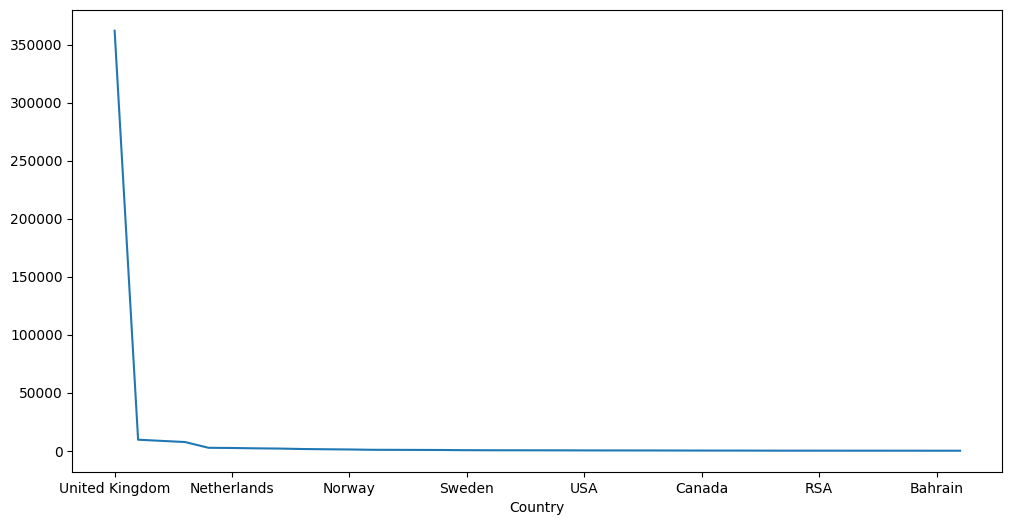

In [ ]:
# Creating count plot of sales distribution of different countries:
plt.figure(figsize=(12, 6))
country_count.plot()

In [ ]:
# counting values of days:
day_count = data['Day'].value_counts()
day_count

Day
6     18915
5     16723
8     16254
7     16011
4     15165
17    15139
20    14940
14    14549
23    14545
10    14473
13    14401
1     13937
28    13778
11    13707
21    13509
18    13234
9     13225
16    12910
27    12708
22    12583
24    12394
2     12380
25    12200
15    11611
19    11106
3     11069
12    10923
30    10221
26     8913
29     8263
31     7043
Name: count, dtype: int64

<BarContainer object of 31 artists>

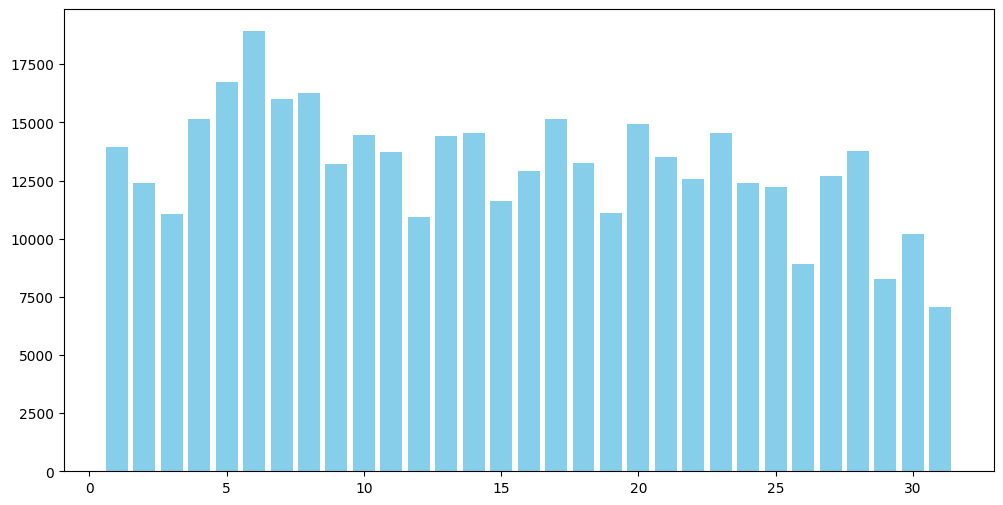

In [ ]:
# creating bar chart that represents the distribution of sales on different days of months:

# Set size of the figure:
plt.figure(figsize=(12, 6))
plt.bar(day_count.index, day_count.values, color='skyblue')

In [ ]:
# Calculating the total sales of different countries:
sales_by_country = pd.DataFrame(data.groupby('Country')['Sales'].sum())
sales_by_country

,Sales
Country,
Australia,137077.270
Austria,10154.320
Bahrain,548.400
Belgium,40910.960
Brazil,1143.600
Canada,3666.380
Channel Islands,20086.290
Cyprus,12946.290
Czech Republic,707.720


In [ ]:
# View countries with max. and min. sales:
print(f'Country with maximum sales: {sales_by_country.idxmax()}')
print(f'\nCountry with minimum sales: {sales_by_country.idxmin()}')

Country with maximum sales: Sales    United Kingdom
dtype: object

Country with minimum sales: Sales    Saudi Arabia
dtype: object


In [ ]:
datetime_index_features = data['Month_name'].dtype == 'datetime64[ns]'

In [ ]:
# Extracting only UK's data as it has max. sales:
Uk_data = data.loc[data['Country'] == 'United Kingdom']
Uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Day_of_week,Month_name,Sales
InvoiceDate,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,1,12,Wednesday,December,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,1,12,Wednesday,December,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34


In [ ]:
# Month wise sales of Uk:
Uk_sales_month = pd.DataFrame(data.groupby('Month_name').sum()[['Sales']])
Uk_sales_month

,Sales
Month_name,
April,426047.851
August,616368.000
December,897110.400
February,436546.150
January,475074.380
July,574238.481
June,608013.160
March,579964.610
May,648251.080


In [ ]:
# View max. and min. sales month of UK:
print(f'UK have max. sales in the month of: {Uk_sales_month.idxmax()}')
print(f'\nUK have min. sales in the month of: {Uk_sales_month.idxmin()}')

UK have max. sales in the month of: Sales    November
dtype: object

UK have min. sales in the month of: Sales    April
dtype: object


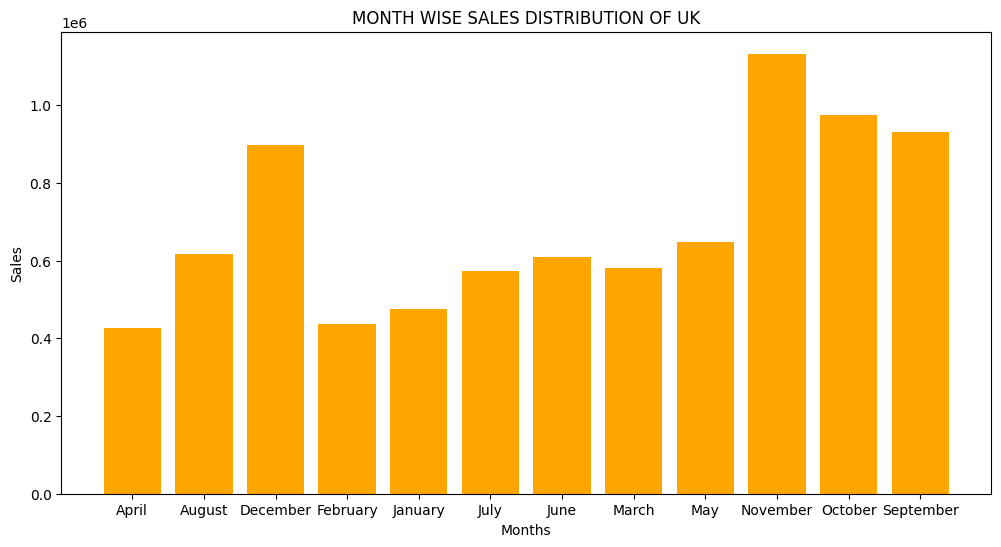

In [ ]:
# Creating bar chart of Month wise sales distrubution of UK:

# Set size of the figure:
plt.figure(figsize=(12, 6))

plt.bar(Uk_sales_month.index,Uk_sales_month.Sales, color='orange')

# Setting lable of x and y axis:
plt.xlabel('Months')
plt.ylabel('Sales')

# Give tittle to the chart:
plt.title('Month wise Sales Distribution of UK'.upper())

#Displaying the Plot:
plt.show()

In [ ]:
#calculating Total sales of uk on different days of week:
Uk_sales_day=pd.DataFrame(data.groupby('Day_of_week').sum()[['Sales']])
Uk_sales_day

,Sales
Day_of_week,
Friday,1241316.181
Monday,1274551.511
Sunday,784418.851
Thursday,1906108.190
Tuesday,1563193.591
Wednesday,1530477.490


In [ ]:
# View max. and min. sales days of week for UK:
print(f'UK have max. sales in the day of week: {Uk_sales_day.idxmax()}')
print(f'\nUK have max. sales in the day of week : {Uk_sales_day.idxmax()}')

UK have max. sales in the day of week: Sales    Thursday
dtype: object

UK have max. sales in the day of week : Sales    Thursday
dtype: object


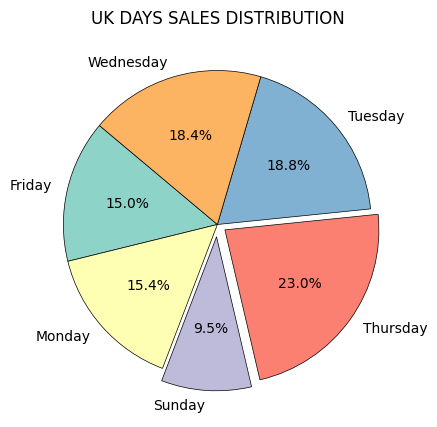

In [ ]:
# Create Pie-chart of distribution of sales on different days of week in UK:

# Set size of the figure:
plt.figure(figsize=(8, 5))

plt.pie(Uk_sales_day.Sales, labels=Uk_sales_day.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'),explode=[0,0,0.08,0.06,0,0,],wedgeprops=dict(edgecolor='black', linewidth=0.5))

# Give tittle to the chart:
plt.title('UK Days Sales Distribution'.upper())

# Displaying the plot:
plt.show()

In [ ]:
# Viewing total number of unique products and customers:
print(len(data['Description'].unique()))
print(len(data['CustomerID'].unique()))

3896
4372


In [ ]:
data.CustomerID.value_counts()

CustomerID
17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: count, Length: 4372, dtype: int64

In [ ]:
# Counting items bought more than 10 times and customers who have bought more than 5 times:

CustomerID = data.groupby('CustomerID')['CustomerID'].transform(len)
Description = data.groupby('Description')['Description'].transform(len)

condition = (CustomerID >5 ) & (Description > 10)

data1 = data[condition]

In [ ]:
data1.CustomerID.value_counts()

CustomerID
17841    7930
14911    5753
14096    5074
12748    4561
14606    2724
         ... 
16190       5
16927       5
15512       5
14836       5
15361       5
Name: count, Length: 4065, dtype: int64

In [ ]:
# Creating new "Hour" and "Minutes" columns in data by using index column:
data['Hour'] = data.index.hour
data['Minutes'] = data.index.minute

# View Transformed data:
data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Day_of_week,Month_name,Sales,Hour,Minutes
InvoiceDate,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,1,12,Wednesday,December,15.30,8,26
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34,8,26
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,1,12,Wednesday,December,22.00,8,26
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34,8,26
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34,8,26


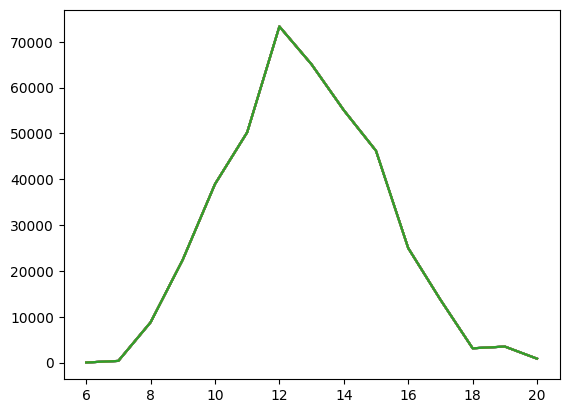

In [ ]:
# Ploting distribution of sales at different:
hours = [hour for hour,i in data.groupby('Hour')]
plt.plot(hours,data.groupby(['Hour']).count())

# Display plot:
plt.show()

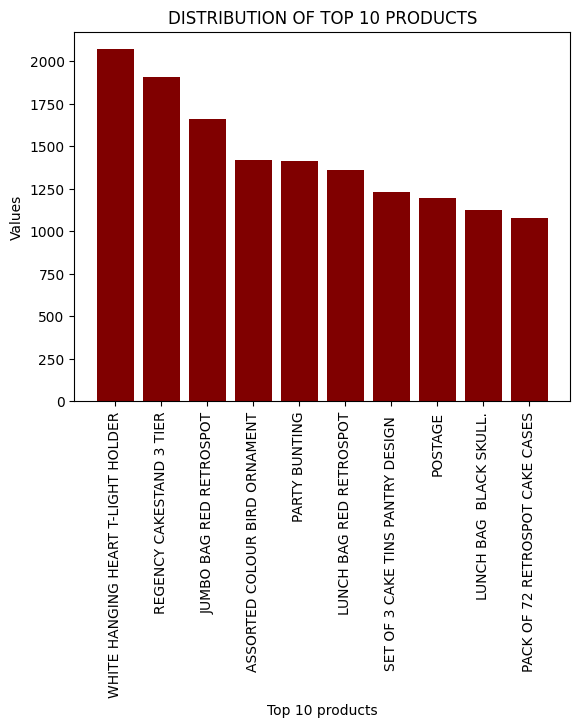

In [ ]:
# Extarcting Top 10 products sold:
Top_10_products = data['Description'].value_counts()[:10]

# Create bar graph of distribution of top 10 products sold:
plt.bar(Top_10_products.index,Top_10_products.values,color='maroon')
# Set x-labels rotated at 90:
plt.xticks(rotation=90)

# Set x and y axis labels:
plt.xlabel('Top 10 products')
plt.ylabel('Values')

# Give Tittle to the graph:
plt.title('distribution of Top 10 products'.upper())

# Displaying the plot:
plt.show()

In [ ]:
numerical_col = ['Quantity', 'UnitPrice', 'Day', 'Month', 'Sales', 'Hour', 'Minutes']

In [ ]:
# Selecting numerical columns from data frame:
df_numerical = data.select_dtypes(include=["int", "float64"])

In [ ]:
# Find correlation of different columns in data frame:
df_numerical.corr()

,Quantity,UnitPrice,Day,Month,Sales,Hour,Minutes
Quantity,1.000000,-0.001238,-0.000190,-0.002477,0.916096,-0.008421,-0.001131
UnitPrice,-0.001238,1.000000,-0.001893,-0.003179,-0.129296,0.001672,-0.000938
Day,-0.000190,-0.001893,1.000000,-0.118598,-0.000720,0.008186,-0.028024
Month,-0.002477,-0.003179,-0.118598,1.000000,-0.001928,0.055541,0.008426
Sales,0.916096,-0.129296,-0.000720,-0.001928,1.000000,-0.007794,-0.000786
Hour,-0.008421,0.001672,0.008186,0.055541,-0.007794,1.000000,-0.123753
Minutes,-0.001131,-0.000938,-0.028024,0.008426,-0.000786,-0.123753,1.000000


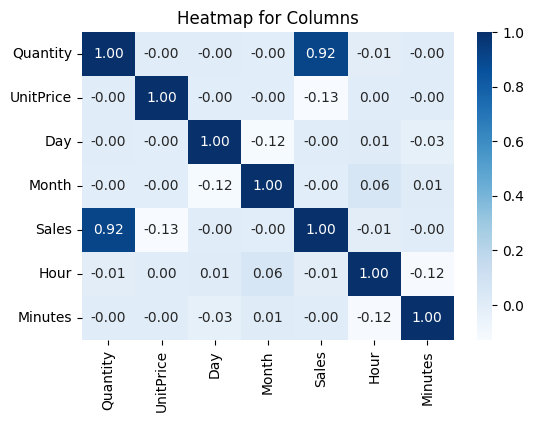

In [ ]:
def create_heatmap(data):
    plt.figure(figsize=(6,4))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='Blues')
    plt.title('Heatmap for Columns')
    plt.show()
create_heatmap(df_numerical)

**Step-4: DATA PREPROCESSING**

In [ ]:
# Create copy of data frame:
data_copy = data.copy()

In [ ]:
# Reset the index column to normal:
df_reset =  data_copy.reset_index()
df_reset.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Day,Month,Day_of_week,Month_name,Sales,Hour,Minutes
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,1,12,Wednesday,December,15.30,8,26
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34,8,26
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,1,12,Wednesday,December,22.00,8,26
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34,8,26
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,1,12,Wednesday,December,20.34,8,26


In [ ]:
# Save updated csv for creating Dashboard:
df_reset.to_csv('sales_data_update.csv', index = False)

In [ ]:
# Select columns for x variable:
selected_col = ['Quantity','UnitPrice','Day','Month','Hour','Minutes']
x = df_reset[selected_col]
x.head()

,Quantity,UnitPrice,Day,Month,Hour,Minutes
0,6,2.55,1,12,8,26
1,6,3.39,1,12,8,26
2,8,2.75,1,12,8,26
3,6,3.39,1,12,8,26
4,6,3.39,1,12,8,26


In [ ]:
# Importing all important libraries of sikitlearn:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define output column as y:
y = df_reset['Sales']

In [ ]:
# Create Standard scaler object:
std_scaler = StandardScaler()

In [ ]:
# Perform Standard scalling of columns in x:
x_std = std_scaler.fit_transform(x)
x_std

array([[-2.43726274e-02, -1.31352523e-02, -1.62197638e+00,
         1.28520968e+00, -2.07333817e+00, -2.57384493e-01],
       [-2.43726274e-02, -1.01667663e-03, -1.62197638e+00,
         1.28520968e+00, -2.07333817e+00, -2.57384493e-01],
       [-1.63305857e-02, -1.02498771e-02, -1.62197638e+00,
         1.28520968e+00, -2.07333817e+00, -2.57384493e-01],
       ...,
       [-3.24146691e-02,  9.94774897e-03, -6.97518378e-01,
         1.28520968e+00, -3.22752063e-01,  1.14730199e+00],
       [-3.24146691e-02,  9.94774897e-03, -6.97518378e-01,
         1.28520968e+00, -3.22752063e-01,  1.14730199e+00],
       [-3.64356900e-02,  2.14892496e-02, -6.97518378e-01,
         1.28520968e+00, -3.22752063e-01,  1.14730199e+00]])

In [ ]:
# Splitting data into train and test:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2)

In [ ]:
# View size of train and test data:
print('---------- TRAIN DATA -----------')
print(f'Size of train data= {x_train.shape}')
print(f'Number of rows in train data= {x_train.shape[0]}')
print(f'Number of columns in train data= {x_train.shape[1]}')
print('---------- TEST DATA -----------')
print(f'Size of test data= {x_test.shape}')
print(f'Number of rows in test data= {x_test.shape[0]}')
print(f'Number of columns in test data= {x_test.shape[1]}')

---------- TRAIN DATA -----------
Size of train data= (325463, 6)
Number of rows in train data= 325463
Number of columns in train data= 6
---------- TEST DATA -----------
Size of test data= (81366, 6)
Number of rows in test data= 81366
Number of columns in test data= 6


**Step-5: MODEL MAKING**

**1) Linear Regression**

In [ ]:
# Check best random state for linear regression model at which we get best accuracy score:

best_accuracy_lr = -1
best_random_state_lr = None


for random_state_lr in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=random_state_lr)
    lr = linear_model.LinearRegression()
    lr.fit(x_train, y_train)
    y_pred_lr = lr.predict(x_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    if r2_lr > best_accuracy_lr:
        best_accuracy_lr = r2_lr
        best_random_state_lr = random_state_lr

print("Best R2 Score:", best_accuracy_lr)
print("Best Random State:", best_random_state_lr)

Best R2 Score: 0.8991508374216692
Best Random State: 93


**2) Ridge Regression**

In [ ]:
# Check best random state for Ridge regression model at which we get best accuracy score:

best_accuracy_ridge = -1
best_random_state_ridge = None

for random_state_ridge in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=random_state_ridge)
    ridge = Ridge(alpha=0.1)
    ridge.fit(x_train, y_train)
    y_pred_ridge = ridge.predict(x_test)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    if r2_ridge > best_accuracy_ridge:
        best_accuracy_ridge = r2_ridge
        best_random_state_ridge = random_state_ridge

print("Best R2 Score for Ridge Regression:", best_accuracy_ridge)
print("Best Random State for Ridge Regression:", best_random_state_ridge)

Best R2 Score for Ridge Regression: 0.8991508090914818
Best Random State for Ridge Regression: 93


**3) Lasso Regression**

In [ ]:
# Check best random state for Lasso regression model at which we get best accuracy score:

best_accuracy_las= -1
best_random_state_las = None

for random_state_las in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=random_state_las)
    lasso = Lasso(alpha=0.1)
    lasso.fit(x_train, y_train)
    y_pred_lasso = ridge.predict(x_test)
    r2_las = r2_score(y_test, y_pred_lasso)
    if r2_las > best_accuracy_las:
        best_accuracy_las = r2_las
        best_random_state_las = random_state_las

print("Best R2 Score for Lasso Regression:", best_accuracy_las)
print("Best Random State for Lasso Regression:", best_random_state_las)

Best R2 Score for Lasso Regression: 0.929967001767785
Best Random State for Lasso Regression: 47


**4) Random Forest Regression**

In [ ]:
# Create Random Forest regression model :

Rfr = RandomForestRegressor()
Rfr.fit(x_train, y_train)
y_pred_rfr = Rfr.predict(x_test)
r2_rfr = r2_score(y_test,y_pred_rfr)
print("R-squared:",r2_rfr)

R-squared: 0.0613694836385521


**5) Gradient Boosting Regression**

In [ ]:
# Check best random state for Gradient Boost regression model at which we get best accuracy score:

best_accuracy_gb = -1
best_random_state_gb = None

for random_state_gb in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2, random_state=random_state_gb)
    gb_regressor = GradientBoostingRegressor(n_estimators=1000, validation_fraction=0.1, n_iter_no_change=5, tol=0.01, random_state=random_state_gb)
    gb_regressor.fit(x_train, y_train)
    y_pred_gb = gb_regressor.predict(x_test)
    gb_r2 = r2_score(y_test, y_pred_gb)
    if gb_r2 > best_accuracy_gb:
        best_accuracy_gb = gb_r2
        best_random_state_gb = random_state_gb

print("Best R^2 Score for Gradient Boost:", best_accuracy_gb)
print("Best Random State for Gradient Boost:", best_random_state_gb)


Best R^2 Score for Gradient Boost: 0.9814048215240653
Best Random State for Gradient Boost: 48


Step-6: MODLE EVALUATION

In [ ]:
# Make list of accuracy of different models and its name:

accuracy_list = [best_accuracy_lr, best_accuracy_ridge, best_accuracy_las, r2_rfr, best_accuracy_gb]
Model_list = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest Regression", "Gradient Boosting"]

In [ ]:
# Create dataframe of model name and its corresponding accuracy:

model_df = pd.DataFrame({"Model": Model_list, "Accuracy": accuracy_list})
model_df

,Model,Accuracy
0,Linear Regression,0.899151
1,Ridge Regression,0.899151
2,Lasso Regression,0.929967
3,Random Forest Regression,0.061369
4,Gradient Boosting,0.981405


<Axes: xlabel='Model'>

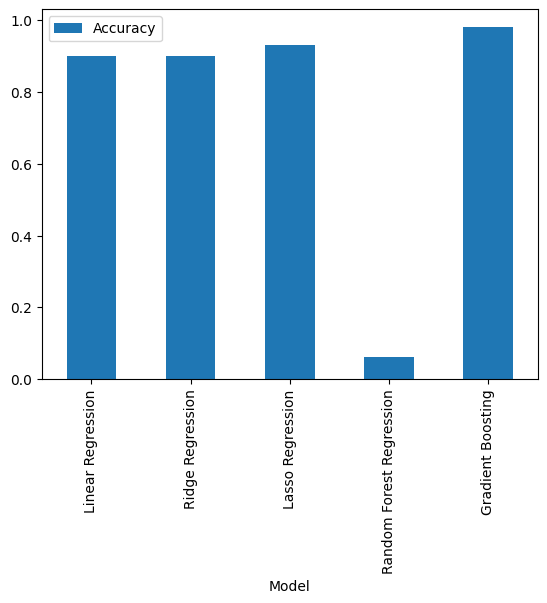

In [ ]:
# Create bar chart of accuracy of different models:

model_df.plot.bar(x="Model", y="Accuracy")